In [30]:
from evaluation import regression_evaluator
from sklearn.feature_selection import RFE, RFECV
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def partition(data, play_type="pass"):
    return data[data['play_type'] == play_type].drop('play_type', axis=1)

In [3]:
data = pd.read_csv("fourth_down_dataset.csv")
print(data['play_type'].value_counts())



passing = partition(data,'pass')
run = partition(data,'run')
fg = partition(data,'field_goal')
punt = partition(data,'punt')

partitioned_dataset = [("run", run) , 
                       ("pass", passing), 
                       ("fg", fg), ("punt", punt)]

play_type
punt          13390
field_goal     5762
pass           2694
run            1608
no_play        1364
qb_kneel         20
Name: count, dtype: int64


In [31]:
partitioned_mets = {}
cv_res = {}

for name, dataset in partitioned_dataset:
    print(name)
    y = dataset['wpa_avg'].to_numpy()
    X = dataset.drop('wpa_avg', axis=1)
    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    n_features = list(range(4, 25))
    all_mets = []
    
    
#     for nf in n_features:
#         print(nf)
#         xg = xgb.XGBRegressor(objective='reg:squarederror', random_state=44449999)

#         rfe = RFE(estimator=xg, n_features_to_select=nf, step=1)
#         rfe.fit(X_train, y_train)


#         selected_cols = X_train.columns[(rfe.support_)]
#         re = regression_evaluator(selected_cols)
#         X_train_sel = X_train[selected_cols]
#         xg.fit(X_train_sel, y_train)

#         X_test_sel = X_test[selected_cols]
#         _ ,test_mets = re.evaluate(xg, X_train_sel, X_test_sel, y_train, y_test)
#         test_mets['n_features'] = nf

#         all_mets.append(test_mets)
        
        
    xg = xgb.XGBRegressor(objective='reg:squarederror', random_state=44449999)
    cv = KFold(n_splits=5, shuffle=True, random_state=44449999)
    rfecv = RFECV(estimator=xg, step=1, cv=cv, scoring='r2',)
    
    rfecv.fit(X_train, y_train)
    print(f"{name} features: {rfecv.n_features_}")
    cv_res[name] = rfecv.cv_results_
    partitioned_mets[name] = all_mets

run
run features: 22
pass
pass features: 6
fg
fg features: 17
punt
punt features: 16


run


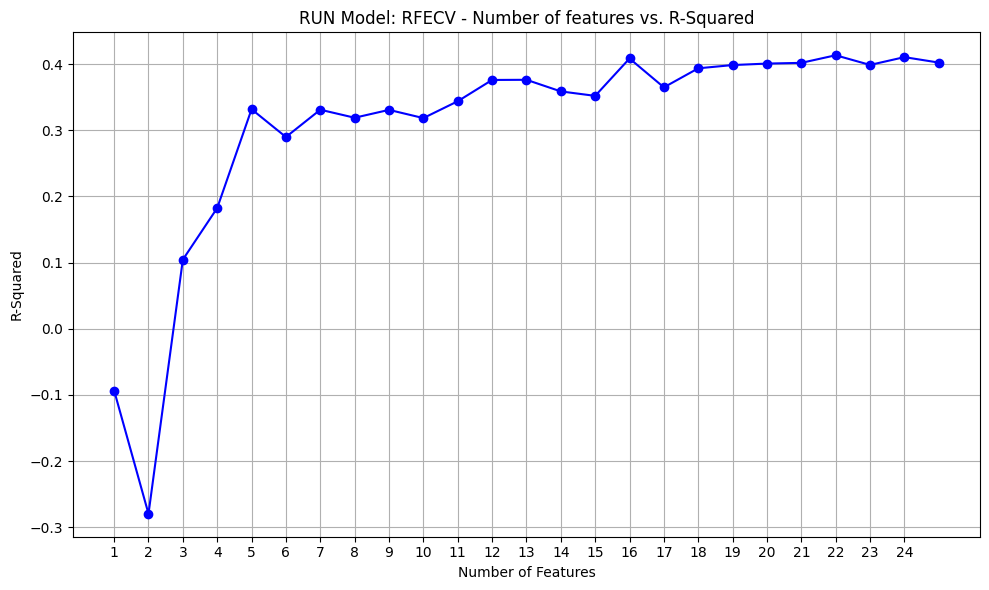

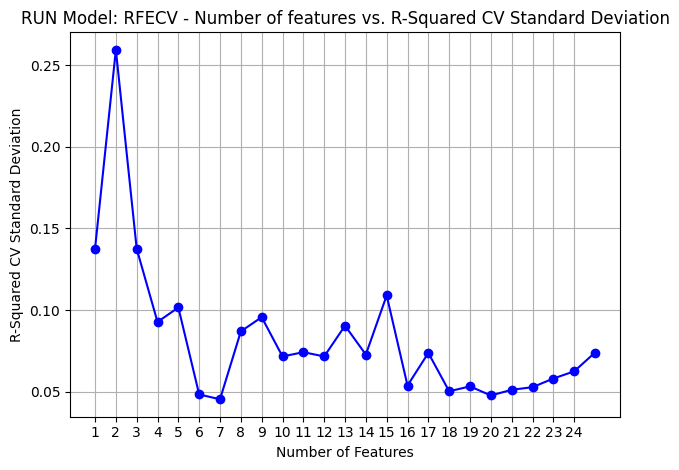

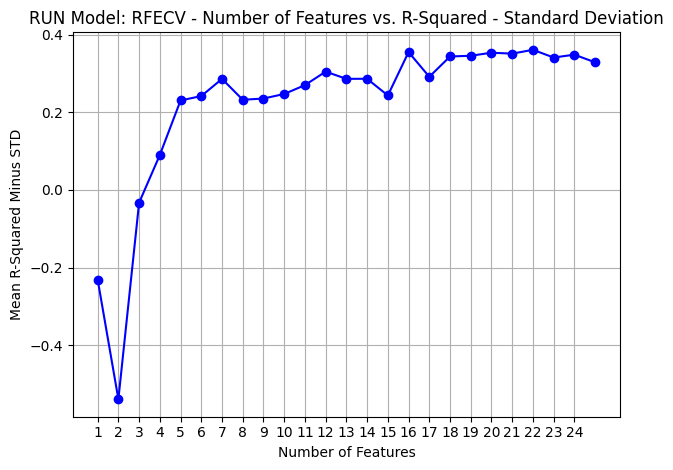

max: 22
pass


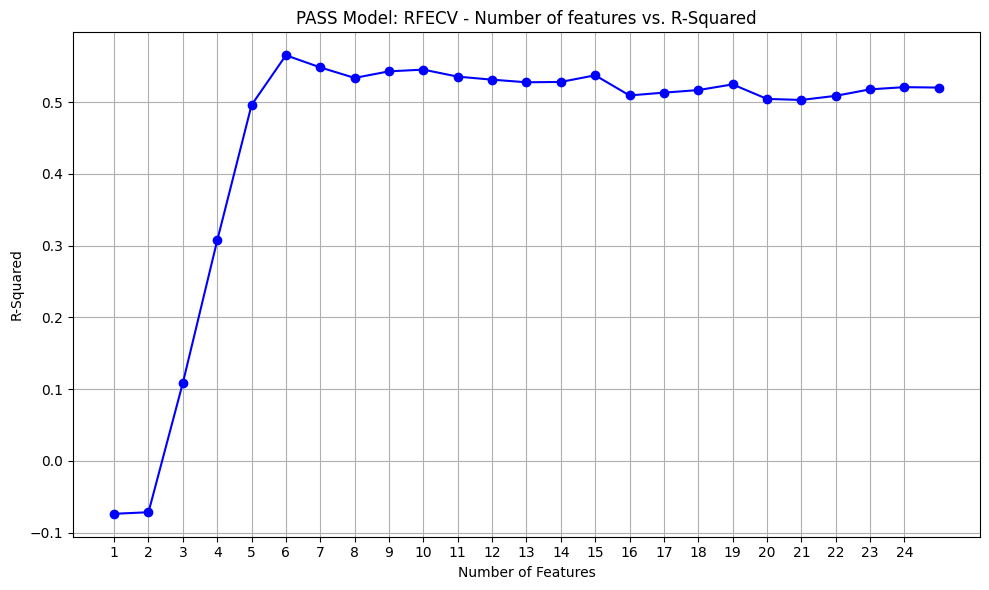

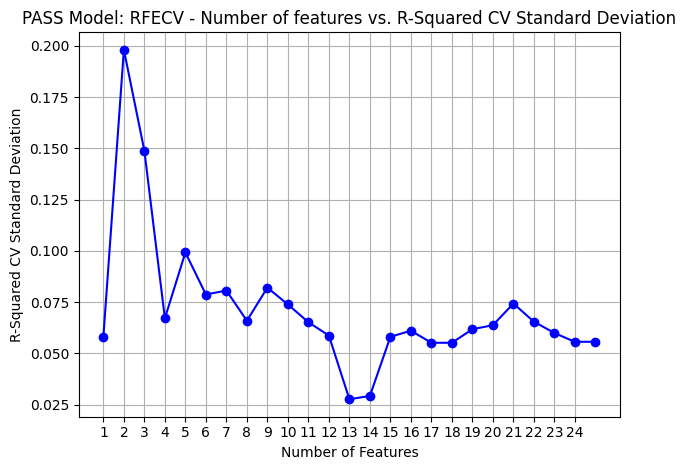

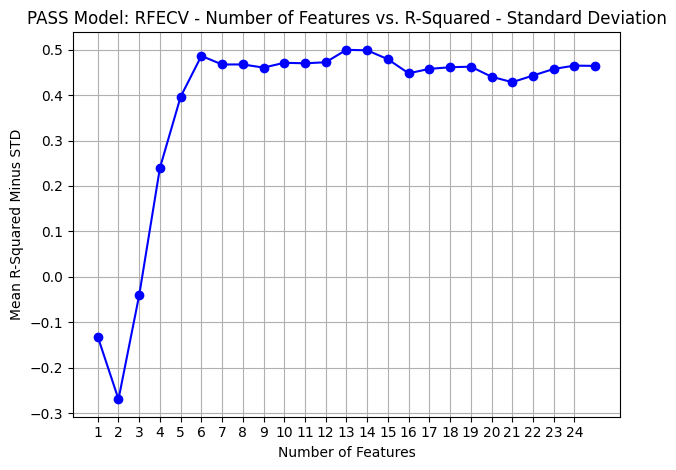

max: 13
fg


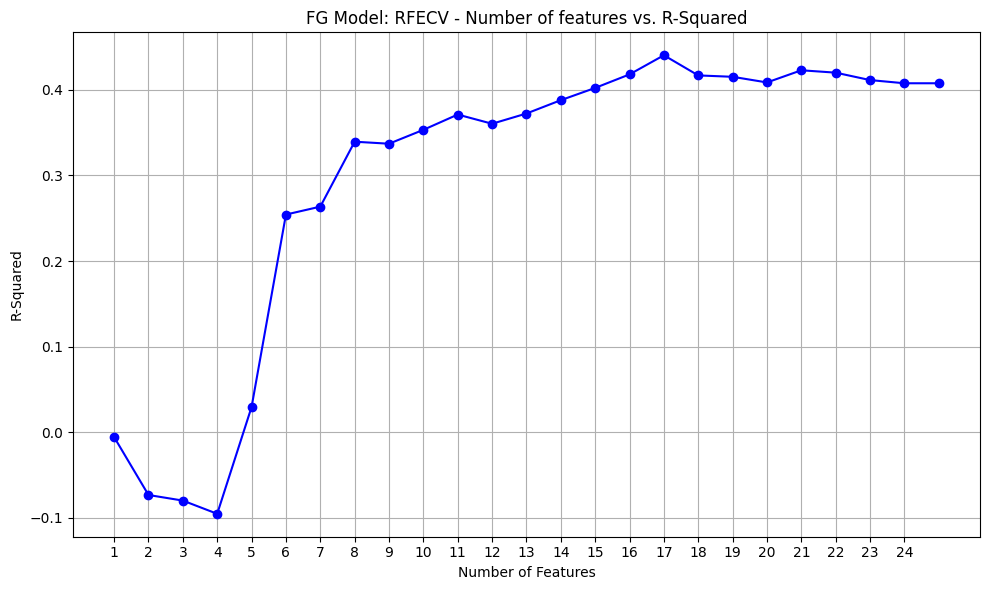

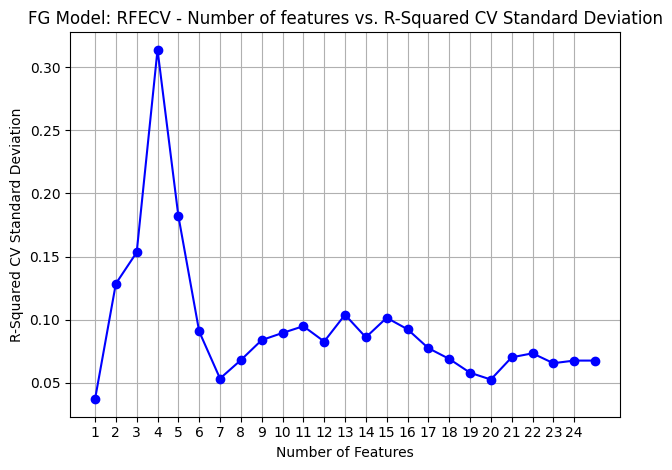

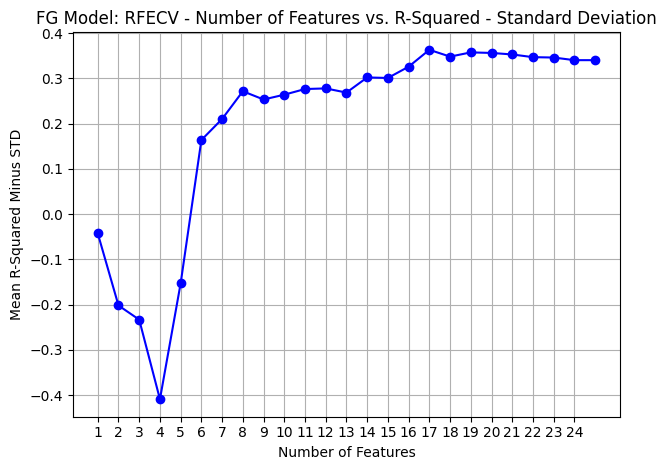

max: 17
punt


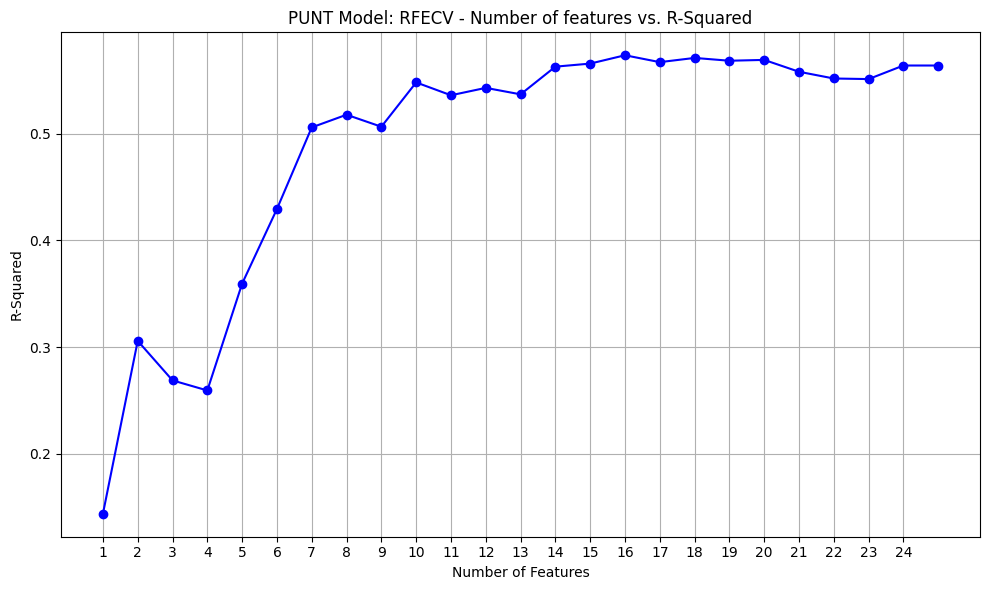

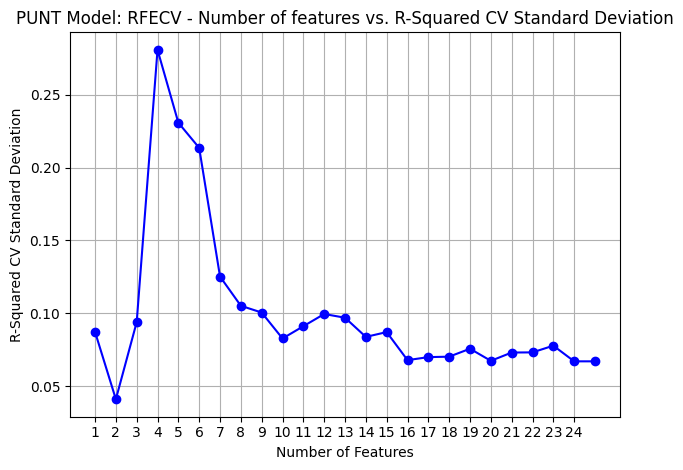

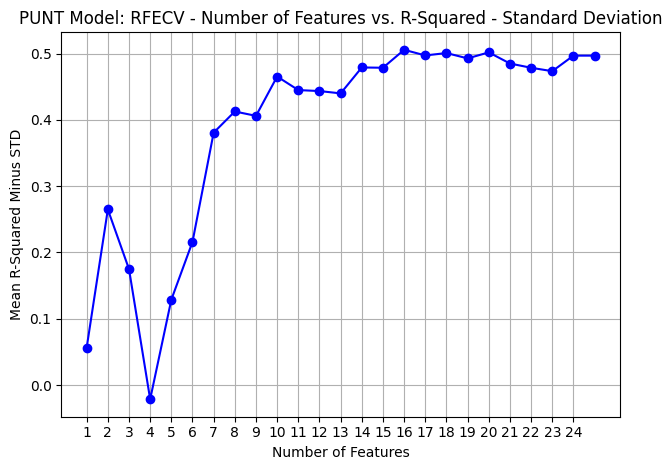

max: 16


In [35]:
for ds_name in partitioned_mets:
    print(ds_name)
    name = ds_name.upper()
#     all_mets = partitioned_mets[ds_name]
#     n_features = [entry['n_features'] for entry in all_mets]
#     r_squared = [entry['R-Squared'] for entry in all_mets]
    

#     plt.figure(figsize=(10, 6))
#     plt.plot(n_features, r_squared, marker='o', linestyle='-', color='blue')
#     plt.xlabel('Number of Features')
#     plt.ylabel('R-squared')
#     plt.title(f'{name} Model: R-squared vs. Number of Features')
#     plt.xticks(range(min(n_features), max(n_features)+1, 1))  # Force xticks to be integers
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
    
    grid_scores = cv_res[ds_name]['mean_test_score']
    std_scores = cv_res[ds_name]['std_test_score']
    score_minus_std = np.array(grid_scores) - np.array(std_scores)
    
    num_features_cv = list(range(1, len(grid_scores) + 1))
    plt.figure(figsize=(10, 6))
    plt.xlabel("Number of Features")
    plt.ylabel("R-Squared")
    plt.plot(num_features_cv, grid_scores,marker='o', linestyle='-', color='blue')
    plt.title(f'{name} Model: RFECV - Number of features vs. R-Squared')
    plt.xticks(range(min(num_features_cv), max(num_features_cv), 1))  # Force xticks to be integers
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    
    plt.figure()
    plt.xlabel("Number of Features")
    plt.ylabel("R-Squared CV Standard Deviation")
    plt.plot(num_features_cv, std_scores,marker='o', linestyle='-', color='blue')
    plt.title(f'{name} Model: RFECV - Number of features vs. R-Squared CV Standard Deviation')
    plt.xticks(range(min(num_features_cv), max(num_features_cv), 1))  # Force xticks to be integers
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure()
    plt.xlabel("Number of Features")
    plt.ylabel("Mean R-Squared Minus STD")
    plt.plot(num_features_cv, score_minus_std,marker='o', linestyle='-', color='blue')
    plt.title(f'{name} Model: RFECV - Number of Features vs. R-Squared - Standard Deviation')
    plt.xticks(range(min(num_features_cv), max(num_features_cv), 1))  # Force xticks to be integers
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    idx = np.argmax(score_minus_std)
    print("max:", num_features_cv[idx])
    
    
    
    
    
    

